In [5]:
import pdfplumber
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
pdf = pdfplumber.open("tdo.pdf")

loc_columns = ["Month_Year", "Total_Events"]


def get_total(doc):
    total_rows = []
    year_counter = 2014
    select_pages = [1, 2, 3, 4, 5, 7, 10, 13]
    doc_pages = list(doc.pages[i] for i in select_pages)
    for page in doc_pages:
        tab_first_half = page.extract_table()[-13:-7]
        tab_second_half = page.extract_table()[-7:-1]
        if year_counter < 2016:
            for row in tab_first_half:
                total_rows.append([row[0] + " " + str(year_counter), row[6]])
            for row in tab_second_half:
                total_rows.append([row[0] + " " + str(year_counter + 1), row[6]])
        else:
            for row in tab_first_half:
                total_rows.append([row[0] + " " + str(year_counter), row[7]])
            for row in tab_second_half:
                total_rows.append([row[0] + " " + str(year_counter + 1), row[7]])
        year_counter += 1
    return total_rows

In [4]:
test = get_total(pdf)
print(test)

[['July 2014', '0'], ['August 2014', '2'], ['September 2014', '1'], ['October 2014', '7'], ['November 2014', '4'], ['December 2014', '2'], ['January 2015', '3'], ['February 2015', '3'], ['March 2015', '5'], ['April 2015', '3'], ['May 2015', '2'], ['June 2015', '4'], ['July 2015', '3'], ['August 2015', '5'], ['September 2015', '3'], ['October 2015', '4'], ['November 2015', '2'], ['December 2015', '3'], ['January 2016', '5'], ['February 2016', '1'], ['March 2016', '4'], ['April 2016', '7'], ['May 2016', '2'], ['June 2016', '5'], ['July 2016', '6'], ['August 2016', '7'], ['September 2016', '3'], ['October 2016', '4'], ['November 2016', '8'], ['December 2016', '2'], ['January 2017', '4'], ['February 2017', '4'], ['March 2017', '6'], ['April 2017', '5'], ['May 2017', '5'], ['June 2017', '2'], ['July 2017', '2'], ['August 2017', '3'], ['September 2017', '6'], ['October 2017', '2'], ['November 2017', '4'], ['December 2017', '1'], ['January 2018', '2'], ['February 2018', '1'], ['March 2018', '

In [13]:
def clean_data(rows, cols):
  df = pd.DataFrame(rows,columns=cols)
  df["Total_Events"] = df["Total_Events"].apply(pd.to_numeric)
  df["Month_Year"] = pd.to_datetime(df["Month_Year"], format="%B %Y")
  df = df.set_index(df["Month_Year"])
  df = df.sort_index()
  return df

In [15]:
test = clean_data(get_total(pdf), loc_columns)
print(test)

           Month_Year  Total_Events
Month_Year                         
2014-07-01 2014-07-01             0
2014-08-01 2014-08-01             2
2014-09-01 2014-09-01             1
2014-10-01 2014-10-01             7
2014-11-01 2014-11-01             4
...               ...           ...
2022-02-01 2022-02-01             9
2022-03-01 2022-03-01             9
2022-04-01 2022-04-01             9
2022-05-01 2022-05-01            12
2022-06-01 2022-06-01             9

[96 rows x 2 columns]


In [19]:
loc_df = clean_data(get_total(pdf), loc_columns)

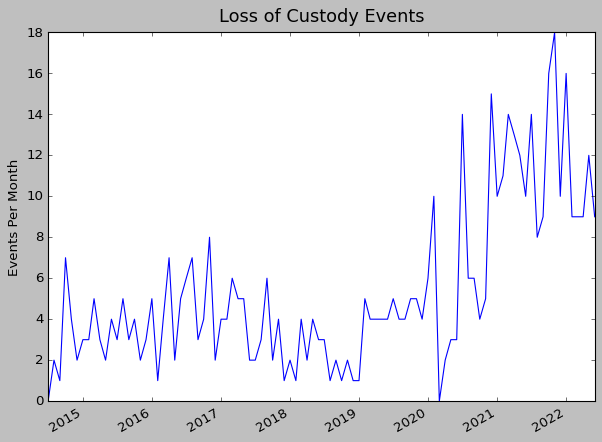

In [23]:
plt.style.use('mpl15')
plt.plot(loc_df['Total_Events'])
plt.ylabel('Events Per Month', fontsize=12.0)
plt.title('Loss of Custody Events', fontsize = 16.0, pad=10.0)
plt.gcf().autofmt_xdate()
plt.tight_layout(pad=2.0)
plt.show()